Step 1: Synthetic time series data generation passed.
Step 2: BOCD model initialization passed.
Step 3: BOCPD algorithm run passed.


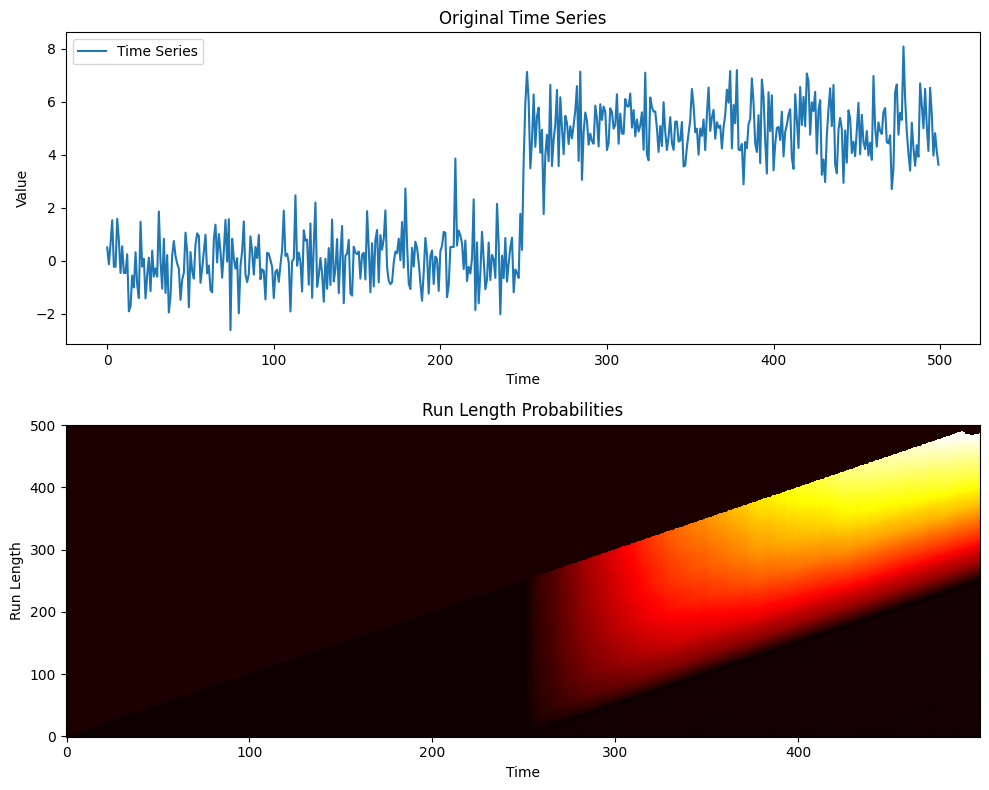

Step 4: Plotting results passed.
BOCD functionality test completed successfully.


In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from bocd import BayesianOnlineChangePointDetection, ConstantHazard, StudentT

# Step 1: Generate synthetic time series data with change points
try:
    np.random.seed(42)
    n = 500
    data = np.concatenate([np.random.normal(0, 1, n//2), np.random.normal(5, 1, n//2)])
    print("Step 1: Synthetic time series data generation passed.")
except Exception as e:
    print(f"Step 1 failed: {str(e)}")
    raise e

# Step 2: Initialize the BOCD model
try:
    hazard = ConstantHazard(250)  # Using a constant hazard function with a half-life of 250
    obs_model = StudentT(mu=0, kappa=1, alpha=1, beta=1)  # Adjusted parameters for Student-T observation model
    bocd = BayesianOnlineChangePointDetection(hazard, obs_model)
    print("Step 2: BOCD model initialization passed.")
except Exception as e:
    print(f"Step 2 failed: {str(e)}")
    raise e

# Step 3: Run BOCPD on the data
try:
    R = np.zeros((len(data), len(data) + 1))  # Run length probabilities matrix (expanded by 1 for safety)
    for t, x in enumerate(data):
        bocd.update(x)
        R[t, :len(bocd.belief)] = bocd.belief

    # Replace zeros with a small positive value to avoid log(0) issues
    R[R == 0] = 1e-10
    print("Step 3: BOCPD algorithm run passed.")
except Exception as e:
    print(f"Step 3 failed: {str(e)}")
    raise e

# Step 4: Plot the results
try:
    fig, ax = plt.subplots(2, 1, figsize=(10, 8))

    # Plot the original time series
    ax[0].plot(data, label='Time Series')
    ax[0].set_title('Original Time Series')
    ax[0].set_xlabel('Time')
    ax[0].set_ylabel('Value')
    ax[0].legend()

    # Plot the run length probabilities
    ax[1].imshow(-np.log(R.T), aspect='auto', origin='lower', cmap='hot', interpolation='none')
    ax[1].set_title('Run Length Probabilities')
    ax[1].set_xlabel('Time')
    ax[1].set_ylabel('Run Length')
    ax[1].set_aspect('auto')

    plt.tight_layout()
    plt.show()
    print("Step 4: Plotting results passed.")
except Exception as e:
    print(f"Step 4 failed: {str(e)}")
    raise e

# Final Confirmation
print("BOCD functionality test completed successfully.")
